# Term Project -대학별 평균 등록금 분석
## 2022103451 한채연


## 1) 주제 선정 이유
 
 작년, 입시를 할때에 저는 대학원서를 쓰기 위해 제가 진학을 원하는 대학들의 등록금에 대해 알아본 경험이 있습니다. 하지만 다양한 대학교들의 평균 등록금을 하나하나 조사해보고 비교하는 것은 상당히 번거로운 일이었습니다. 저는 우리 나라에 있는 대학들의 평균 등록금을 한눈에 파악할 수 있게 정리하여, 저와 같은 고민을 가진 저의 재수생 친구들에게 도움이 되기 위해 이 주제를 선택하였습니다.

## 2) 가설 정의

 이 프로젝트에서 저는 다양한 대학교들의 등록금을 한눈에 파악할 수 있도록 1) 국내  대학에서 평균 등록금 top 15의 대학 순위, 2) 한 지역의 평균 등록금 top 5 대학 순위, 3) 각 지역의 평균 등록금 top 5의 평균값을 나타낸 그래프, 4) 한 대학교가 속한 지역과 평균 등록금을 분석할 수 있는 코드를 작성할 계획입니다.

## 3) 인터넷을 통한 데이터 획득

위와 같은 분석을 진행하기 위해서 공공 데이터 포털(http://www.data.go.kr/index.do)에서 한국 장학 재단이 제공하는 <대학별 평균등록금_20220430> csv 파일을 pandas를 이용하여 열었습니다. 또한 다운 받은 csv파일에서 분석에 필요하지 않은 정보들은 삭제했습니다.

#### pandas 호출 및 pandas가 한번에 반환할 수 있는 행의 갯수 확인 및 늘리기.

In [1]:
# pandas 호출하기
import pandas as pd

# pandas가 한번에 반환할 수 있는 행의 갯수 늘리기
pd.options.display.max_rows=9999

#### csv 파일 열기(한글 전용 인코딩 방식 사용)¶

In [2]:
# csv 파일 열기
campus_price=pd.read_csv('한국장학재단_대학별 평균등록금_20220430.csv',encoding='cp949')

# 필요없는 열 지우기
campus_price=campus_price.drop(['설립별','입학정원 합(명)','평균입학금(원)','학제별'],axis=1)

## 4) 분석을 위한 데이터의 가공

pandas를 사용하여 연 파일을 분석에 용이하도록 4가지 방식으로 가공할 것입니다.

1) 전체 대학 평균 등록금 top 15를 구하고 함수로 출력하기

2) 한 지역의 등록금 top 5와 top 5의 평균 구하고 함수로 출력하기

3) 지역별 top 5의 평균 등록금을 그래프로 구하고 함수로 출력하기

4) 국내에 위치한 한 대학을 입력했을 때 그 대학이 속한 지역, 평균 등록금 구하고 함수로 출력하기

5) 1)~4)에서 작성한 각각의 함수를 result_1() 함수에 넣기

아래에서 1)~5)의 과정을 확인할 수 있습니다.


####  1)전체 대학 평균 등록금 top 15 나타내기¶

In [3]:
# info통해 총 대학 수 파악하기
campus_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대학명       388 non-null    object
 1   지역별       388 non-null    object
 2   평균등록금(원)  388 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.2+ KB


In [4]:
# 평균 등록금 순으로 대학교 나열하기
high_price=campus_price.sort_values(by='평균등록금(원)',ascending=False)

# dataframe의 index를 '순위'로 정렬하기
high_price.index=range(1,389)
high_price['순위']=range(1,389)
high_price=high_price.set_index(keys=['순위'],inplace=False, drop=True)

# 전체 대학 등록금 top 15 나타내기
term_1=high_price[0:15]


#  전체 대학 등록금 top 15 출력해보기
term_1


,대학명,지역별,평균등록금(원)
순위,,,
1,한국공학대학교,경기,9034616
2,한국에너지공과대학교,전남,9000000
3,연세대학교,서울,8949735
4,추계예술대학교,서울,8778884
5,신한대학교,경기,8714105
6,이화여자대학교,서울,8689951
7,을지대학교,대전,8492904
8,한양대학교,서울,8486720
9,한국항공대학교,경기,8465834


In [5]:
# 전체 평균 등록금 top 15 나타내는 함수 만들기(dataframe 깔끔하게 정리하기)
from pandas import DataFrame
def top_15():
    print(pd.DataFrame.stack(term_1,level=-1, dropna=True))

####  2) 한 지역의 등록금  top 5와  top 5의 평균 나타내기

In [6]:
# 각 지역을 기준으로 범주 나누기 
each_locate=campus_price.groupby('지역별')


# 지역별로 대학 나타내기 위해 딕셔너리 사용
locate_dict=dict(list(each_locate))

# 각 지역을 평균 등록금이 높은 순서대로 나타내고, 한 list안에 넣기
campus_list=[]
for i in locate_dict:
    region=locate_dict[i]
    region_1=region.sort_values(by='평균등록금(원)',ascending=False)
    region_1['순위']=range(1,len(region)+1)
    region_1.index=range(1,len(region)+1)
    region_1=region_1.set_index(keys=['순위'],inplace=False, drop=True)
    campus_list.append(region_1)
    campus_top_list=[]
    
    #각 지역의 평균 등록금 top 5를 구해서 한 list에 넣기(세종의 경우 대학이 2개 뿐이라 top 2만을 나타냄)
    for i in campus_list:
        campus_top_list.append(i[0:5])
        
        # 각 지역의 평균 등록금 top5의 평균 구하기
        for i in campus_top_list:
            means=[]
            means.append(i['평균등록금(원)'].mean())

#강원도의 등록금 top 5 대학 출력해보기
campus_top_list[0]

,대학명,지역별,평균등록금(원)
순위,,,
1,경동대학교,강원,7936099
2,한국골프대학교,강원,7887500
3,한림대학교,강원,7483254
4,가톨릭관동대학교,강원,7199666
5,상지대학교,강원,7171565


In [7]:
#각 지역의 top 5와 각 지역 Top 5의 평균을 딕셔너리로 묶어서 나타내기}
region_mean=[7535616.8, 8547956.0, 6782651.2, 7648763.4, 6703981.4, 6506212.6 ,7515941.8 ,6853650.6 ,8657265.6, 5917194.0, 5617955.2, 6915011.8, 7136519.2, 7432166.0, 4357419.8, 7874414.8, 7436608.0]
region_name=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주', '충남', '충북']
region_fin={}
for i in range(len(region_mean)):
    region_fin[region_name[i]]= region_mean[i]
    
# 각 지역의 top 5와 각 지역 Top 5의 평균 출력해보기
region_fin

{'강원': 7535616.8,
 '경기': 8547956.0,
 '경남': 6782651.2,
 '경북': 7648763.4,
 '광주': 6703981.4,
 '대구': 6506212.6,
 '대전': 7515941.8,
 '부산': 6853650.6,
 '서울': 8657265.6,
 '세종': 5917194.0,
 '울산': 5617955.2,
 '인천': 6915011.8,
 '전남': 7136519.2,
 '전북': 7432166.0,
 '제주': 4357419.8,
 '충남': 7874414.8,
 '충북': 7436608.0}

In [8]:
# 한 지역의 평균 등록금 top 5와 이 top 5의 평균 등록금 값 나타내는 함수 만들기
def top_mean():
    while True:
        print('\U0001F4D7''\033[1m평균 등록금 top 5와 그 평균을 알고 싶은 시 또는 도를 입력하세요(ex: 강원)\033[0m')
        answer_1=input()
        region_name_1=['강원','경기','경남','경북','광주','대구','대전','부산','서울','울산','인천','전남','전북','제주', '충남', '충북']
        
        if answer_1 in region_name_1:
            a= region_name.index(answer_1)
            print('\033[1m\033[4m'+answer_1+'의 평균 top 5의 그래프는 아래와 같으며')
            print(answer_1+'의 평균 등록금 top 5 대학의 평균값은 '+str(region_fin[answer_1])+' 입니다'+'\033[0m' )
            print(pd.DataFrame.stack(campus_top_list[a],level=-1, dropna=True))
            break
            
        elif answer_1=='세종':
            print('\033[1m\033[4m'+answer_1+'의 평균 top 2의 그래프는 아래와 같으며')
            print(answer_1+'의 평균 등록금 top 2 대학의 평균값은 '+str(region_fin[answer_1])+' 입니다'+'\033[0m' )
            print(pd.DataFrame.stack(campus_top_list[9],level=-1, dropna=True))
            break
            
        else:
            print('\033[1m\033[31m'+answer_1+'은(는) 존재하지 않는 지역명입니다')
            print('철자가 옳은지 다시 한번 확인해 주세요'+'\033[0m')
    

#### 3) 지역별 top 5의 평균 등록금을 그래프로 나타내주는 함수 만들기

In [9]:
# 그래프를 그리기 위해 matplotlib 과 numpy 호출하기
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#한글 폰트 사용하기 위한 코드
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

#그래프 그리는 함수 만들기
def region_top_graph():
    x=np.array(['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주', '충남', '충북'])
    y=np. array([7535616.8, 8547956.0, 6782651.2, 7648763.4, 6703981.4, 6506212.6 ,7515941.8 ,6853650.6 ,8657265.6, 5917194.0, 5617955.2, 6915011.8, 7136519.2, 7432166.0, 4357419.8, 7874414.8, 7436608.0])
    plt.bar(x,y,color='#9370DB')
    plt.xlabel('시도명')
    plt.ylabel('평균등록금(원)')
    plt.xticks(ticks=x, labels=x, rotation=45)
    font={'family':'serif','color':'black','size':20}
    plt.title('Average tuition by region',fontdict=font)
    plt.show()



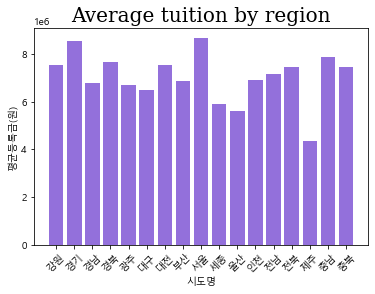

In [11]:
# 함수 호출해보기
region_top_graph()

#### 4) 국내에 위치한 한 대학을 입력했을 때 그 대학이 속한 지역, 평균 등록금 출력해주는 코드 만들기

In [12]:
# column '지역별', '평균 등록금(원)', '대학명'에 속한 각각의 데이터 얻기
data_a=campus_price['지역별']
data_b=campus_price['평균등록금(원)']
data_c=campus_price['대학명']

# 세개의 list를 만들어서 column '지역별', '평균 등록금(원)', '대학명'에 속한 각각의 데이터 넣기
eRigion=[]
for i in data_a:
    eRigion.append(i)

eMoney=[]    
for i in data_b:
    eMoney.append(i)

eName=[]
for i in data_c:
    eName.append(i)

# 대학 이름: 대학이 속한 지역/ 대학 이름: 그 대학의 등록금을 나타내는 딕셔너리 만들기
dictionary_1=dict(zip(eName,eRigion))
dictionary_2=dict(zip(eName, eMoney))

# 예시로 dictionary_1 출력해보기
print(dictionary_1)

{'강릉원주대학교': '강원', '강원대학교': '강원', '경남과학기술대학교': '경남', '경북대학교': '대구', '경상국립대학교': '경남', '경인교육대학교': '인천', '공주교육대학교': '충남', '공주대학교': '충남', '광주과학기술원': '광주', '광주교육대학교': '광주', '군산대학교': '전북', '금오공과대학교': '경북', '대구경북과학기술원': '대구', '대구교육대학교': '대구', '목포대학교': '전남', '목포해양대학교': '전남', '부경대학교': '부산', '부산교육대학교': '부산', '부산대학교': '부산', '서울과학기술대학교': '서울', '서울교육대학교': '서울', '서울대학교': '서울', '서울시립대학교': '서울', '순천대학교': '전남', '안동대학교': '경북', '울산과학기술원': '울산', '인천대학교': '인천', '전남대학교': '광주', '전북대학교': '전북', '전주교육대학교': '전북', '제주대학교': '제주', '진주교육대학교': '경남', '창원대학교': '경남', '청주교육대학교': '충북', '춘천교육대학교': '강원', '충남대학교': '대전', '충북대학교': '충북', '한경대학교': '경기', '한국과학기술원': '대전', '한국교원대학교': '충북', '한국교통대학교': '충북', '한국에너지공과대학교': '전남', '한국예술종합학교': '서울', '한국전통문화대학교(일반)': '충남', '한국체육대학교': '서울', '한국해양대학교': '부산', '한밭대학교': '대전', '가야대학교(김해)': '경남', '가천대학교': '경기', '가톨릭관동대학교': '강원', '가톨릭꽃동네대학교': '충북', '가톨릭대학교': '경기', '감리교신학대학교': '서울', '강남대학교': '경기', '건국대학교': '서울', '건양대학교': '충남', '경기대학교': '경기', '경남대학교': '경남', '경동대학교': '강원', '경성대학교': '부산', '경운대학교': '경북

In [13]:
#한 대학을 입력했을 때 그 대학이 속한 지역과 평균 등록금 출력하는 함수 만들기
def choose_campus():
    
    while True:
        print('\U0001F4D5''\033[1m지역과 평균 등록금을 알고싶은 대학교의 이름을 띄어쓰기 없이 입력하세요 ex-경희대학교\033[0m')
        answer_2=input()
        print()
        
        if answer_2 in dictionary_1:
            print('\033[1m\033[4m'+ answer_2+ '가 속한 지역은 '+dictionary_1[answer_2]+'이며 평균등록금은 '+str(dictionary_2[answer_2])+'원 입니다'+'\033[0m')
            break
            
        else:
            print('\033[1m\033[31m' + answer_2+' 은(는) 존재하지 않는 대학명입니다')
            print('철자가 옳은지 다시 한번 확인해주세요'+'\033[0m')   

#### 5) 결론 도출 위한 코드 작성하기

In [14]:
def result_1():
    print('\033[1m\033[4m우리나라에 속한 대학교의 등록금 관련 정보를 얻을 수 있는 프로그램입니다\033[0m')
    
    while True:
        print()
        print()
        print('\U0001F340','\033[1m\033[2m국내 대학 중 평균 등록금이 높은 top 15개의 대학---> 1')
        print('\U0001F340','각 지역의 대학 중 평균 등록금이 높은 top 5 대학의 등록금 평균 그래프---> 2 ')
        print('\U0001F340''한 대학을 입력했을 때 그 대학의 지역과 평균 등록금---> 3')
        print('\U0001F340' '한 지역의 등록금 top5와 그 top 5의 평균---> 4 ')
        print('\U0001F6D1''\033[1m\033[31m프로그램 종료--->0\033[1m\033[0m')
        print()
        print('\U0001F50E''\033[1m\033[1m알고 싶은 정보를 가리키는 숫자를 입력해주세요\033[0m')
        answer=input()
        print()
        
        if answer=='1':
            print('\U0001F4A1''\033[1m국내에서 평균 등록금이 가장 높은 top 15개의 대학에 대한 정보를 선택하셨습니다\033[0m')
            print()
            top_15()
            
        elif answer=='2':
            print('\U0001F4A1''\033[1m각 지역에 속한 대학 중 평균 등록금이 높은 top 5 대학의 등록금 평균 그래프에 대한 정보를 선택하셨습니다\033[0m')
            region_top_graph()
            
        elif answer=='3':
            print('\U0001F4A1''\033[1m한 대학을 입력했을 때 그 대학의 지역과 평균 등록금에 대한 정보를 선택하셨습니다\033[0m')
            print()
            choose_campus()
            
        elif answer=='4':
            print('\U0001F4A1''\033[1m한 지역의 평균 등록금 top5 대학과 그 top5 대학의 평균 등록금에 대한 정보를 선택하셨습니다\033[0m')
            top_mean()
           
        elif answer=='0':
            print('\033[1m프로그램을 종료합니다\033[0m')
            break
        
        else:
            print('🚨''\033[1m\033[31m잘못된 입력입니다 다시 입력해주세요\033[0m')            

## 5) 분석 결과 도출

#### Restart & Run All을 누르면 코드 자동 실행

우리나라에 속한 대학교의 등록금 관련 정보를 얻을 수 있는 프로그램입니다


🍀 국내 대학 중 평균 등록금이 높은 top 15개의 대학---> 1
🍀 각 지역의 대학 중 평균 등록금이 높은 top 5 대학의 등록금 평균 그래프---> 2 
🍀한 대학을 입력했을 때 그 대학의 지역과 평균 등록금---> 3
🍀한 지역의 등록금 top5와 그 top 5의 평균---> 4 
🛑프로그램 종료--->0

🔎알고 싶은 정보를 가리키는 숫자를 입력해주세요
1

💡국내에서 평균 등록금이 가장 높은 top 15개의 대학에 대한 정보를 선택하셨습니다

순위          
1   대학명            한국공학대학교
    지역별                 경기
    평균등록금(원)       9034616
2   대학명         한국에너지공과대학교
    지역별                 전남
    평균등록금(원)       9000000
3   대학명              연세대학교
    지역별                 서울
    평균등록금(원)       8949735
4   대학명            추계예술대학교
    지역별                 서울
    평균등록금(원)       8778884
5   대학명              신한대학교
    지역별                 경기
    평균등록금(원)       8714105
6   대학명            이화여자대학교
    지역별                 서울
    평균등록금(원)       8689951
7   대학명              을지대학교
    지역별                 대전
    평균등록금(원)       8492904
8   대학명              한양대학교
    지역별                 서울
    평균등록금(원)       8486720
9   대학명            한국항공대학교
    지역별    

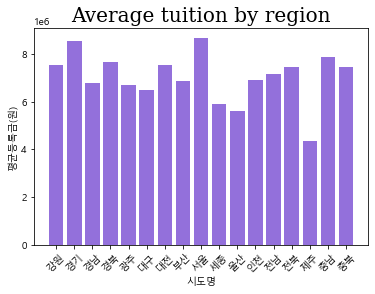



🍀 국내 대학 중 평균 등록금이 높은 top 15개의 대학---> 1
🍀 각 지역의 대학 중 평균 등록금이 높은 top 5 대학의 등록금 평균 그래프---> 2 
🍀한 대학을 입력했을 때 그 대학의 지역과 평균 등록금---> 3
🍀한 지역의 등록금 top5와 그 top 5의 평균---> 4 
🛑프로그램 종료--->0

🔎알고 싶은 정보를 가리키는 숫자를 입력해주세요
3

💡한 대학을 입력했을 때 그 대학의 지역과 평균 등록금에 대한 정보를 선택하셨습니다

📕지역과 평균 등록금을 알고싶은 대학교의 이름을 띄어쓰기 없이 입력하세요 ex-경희대학교
경희대학교

경희대학교가 속한 지역은 서울이며 평균등록금은 7938355원 입니다


🍀 국내 대학 중 평균 등록금이 높은 top 15개의 대학---> 1
🍀 각 지역의 대학 중 평균 등록금이 높은 top 5 대학의 등록금 평균 그래프---> 2 
🍀한 대학을 입력했을 때 그 대학의 지역과 평균 등록금---> 3
🍀한 지역의 등록금 top5와 그 top 5의 평균---> 4 
🛑프로그램 종료--->0

🔎알고 싶은 정보를 가리키는 숫자를 입력해주세요
4

💡한 지역의 평균 등록금 top5 대학과 그 top5 대학의 평균 등록금에 대한 정보를 선택하셨습니다
📗평균 등록금 top 5와 그 평균을 알고 싶은 시 또는 도를 입력하세요(ex: 강원)
강원
강원의 평균 top 5의 그래프는 아래와 같으며
강원의 평균 등록금 top 5 대학의 평균값은 7535616.8 입니다
순위          
1   대학명            경동대학교
    지역별               강원
    평균등록금(원)     7936099
2   대학명          한국골프대학교
    지역별               강원
    평균등록금(원)     7887500
3   대학명            한림대학교
    지역별               강원
    평균등록금(원)     7483254
4   대학명         가톨릭관

In [15]:
result_1()

## 6) 결론

저는 이번 텀 프로젝트를 통해 국내에 있는 대학교의 평균 등록금에 관한 분석을 진행했습니다. 

먼저 분석 결과에 대해 이야기해 보자면,이 프로그램은 대학 등록금에 대한 정보를 필요로 하는 사용자들을 위해 평균 등록금을 기준으로 하여 1) 전체 대학 평균 등록금 top 15 제공 2) 한 지역의 등록금 top 5와 top 5의 평균 제공, 3) 지역별 top 5의 평균 등록금 그래프 제공, 4) 국내에 위치한 대학을 입력 시 그 대학이 속한 지역, 평균 등록금 제공과 같이 4가지 방식으로 데이터를 가공하여 분석하였습니다. 이러한 분석을 통해 패턴 없이 존재했던 원본 파일을 사용자가 쉽게 파악할 수 있게 되었습니다. 

다만, 이 프로그램이 제공하는 기능이 한정적이라는 점, 사용자에게서 원하는 대학명을 입력받을 때 'oo대학교'가 아닌'oo대' ,'oo', 혹은 캠퍼스를 구분하지 않고 입력하였을 때 에러가 나는 점, 또한 사용자에게서 원하는 시도명을 입력받을때 'oo'이 아닌 'oo도' 혹은 'oo시'라고 입력하였을 때 에러가 나는 점은 앞으로 더 개선 되어야할 부분입니다.




## 7) 참고문헌
- 파이썬으로 데이터 주무르기 독특한 예제를 통해 배우는 데이터 분석 입문,민형기, 비제이퍼블릭, 2017.12.29.
- https://www.w3schools.com/python/pandas/pandas_correlations.asp
-https://www.w3schools.com/python/matplotlib_bars.asp
- https://unicode-table.com/kr/emoji/#link-objects
- https://www.geeksforgeeks.org/python-convert-a-list-to-dictionary/
- https://www.w3schools.com/python/numpy/default.asp
- https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/

## 8) 3)의 데이터 원본
- https://www.data.go.kr/data/3071171/fileData.do (한국장학재단_대학별 평균등록금)

## 9)  4)의 가공된 데이터 원본
별첨

## 10) 3)을 4)로 변환하는 등의 작업을 위하여 직접 개발한 Python 소스코드 원본
별첨